<a href="https://colab.research.google.com/github/ssaket/visual-perception/blob/main/models/CIFAR-basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [2]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()
x_train, x_test = x_train /255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print('Training shape', x_train.shape)
print('Label shape', y_train.shape)

Training shape (50000, 32, 32, 3)
Label shape (50000,)


In [4]:
#number of classes
K = len(set(y_train))
print('Total class %d'%K)

Total class 10


In [5]:
#build model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, 3, strides=2, activation='relu')(i)
x = Conv2D(64, 3, strides=2, activation='relu')(i)
x = Conv2D(128, 3, strides=2, activation='relu')(i)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(inputs=i, outputs=x)

In [6]:
#compile and fit
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 60s 19ms/step - loss: 1.4949 - accuracy: 0.4679 - val_loss: 1.3075 - val_accuracy: 0.5376
Epoch 2/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2083 - accuracy: 0.5726 - val_loss: 1.1879 - val_accuracy: 0.5664
Epoch 3/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0329 - accuracy: 0.6371 - val_loss: 1.1522 - val_accuracy: 0.5985
Epoch 4/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8739 - accuracy: 0.6906 - val_loss: 1.0632 - val_accuracy: 0.6350
Epoch 5/15
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7317 - accuracy: 0.7414 - val_loss: 1.0761 - val_accuracy: 0.6396
Epoch 6/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6037 - accuracy: 0.7886 - val_loss: 1.1515 - val_accuracy: 0.6216
Epoch 7/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5111 - accuracy: 0.8220 - val_loss: 1.1674 -

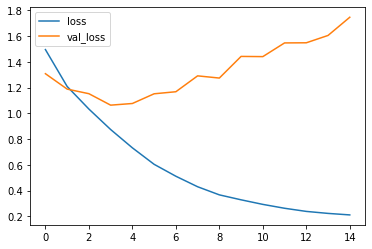

In [11]:
import seaborn as sns
sns.lineplot(x=range(len(r.history['loss'])), y=r.history['loss'], label='loss')
sns.lineplot(x=range(len(r.history['val_loss'])), y=r.history['val_loss'], label='val_loss')

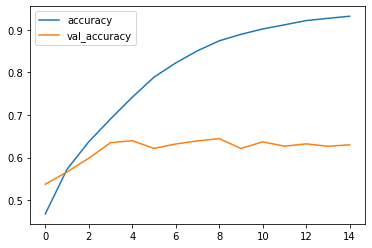

In [13]:
sns.lineplot(x=range(len(r.history['accuracy'])), y=r.history['accuracy'], label='accuracy')
sns.lineplot(x=range(len(r.history['val_accuracy'])), y=r.history['val_accuracy'], label='val_accuracy')

In [15]:
y_pred = model.predict(x_test).argmax(axis=1)

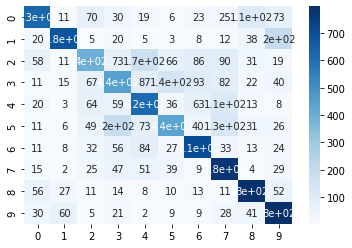

In [17]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [18]:
# missclassified classes
missclassified_idx = np.where(y_pred != y_test)[0]

In [21]:
#CIFAR-10 labels
labels = '''
airplane 										
automobile 										
bird 										
cat 										
deer 										
dog 										
frog 										
horse 										
ship 										
truck
'''.split()

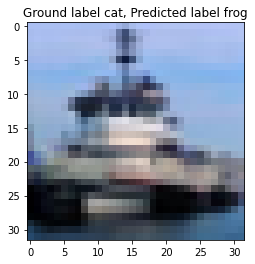

In [27]:
#plotting missclassified classes
import matplotlib.pyplot as plt
idx = np.random.choice(missclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('Ground label %s, Predicted label %s'%(labels[y_test[idx]], labels[y_pred[idx]]));